In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
from pydataset import data

Boolean masking -  
We can use an array of boolean values to return a subset of our series.  
We only get back values where the boolean array is True.  
We can evaluate multiple statements at once.

In [3]:
my_series = pd.Series(range(1,21,1))

In [6]:
my_series > 10

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
dtype: bool

In [7]:
my_series[my_series > 10]

10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

In [9]:
my_series[my_series % 2 == 1]

0      1
2      3
4      5
6      7
8      9
10    11
12    13
14    15
16    17
18    19
dtype: int64

In [4]:
my_series[(my_series > 10) & (my_series % 2 == 1)]
my_series[(my_series > 10) | (my_series % 2 == 1)]

0      1
2      3
4      5
6      7
8      9
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

The curriculum has a method for determining which values belong in the fourth quartile.  

We could also do it with [pd.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html#pandas.qcut).  

We will pass two arguments: the pandas series, and the number of bins we want (4 for quartiles).

In [15]:
pd.qcut(my_series, 4, labels=['q1', 'q2', 'q3', 'q4'])

0     q1
1     q1
2     q1
3     q1
4     q1
5     q2
6     q2
7     q2
8     q2
9     q2
10    q3
11    q3
12    q3
13    q3
14    q3
15    q4
16    q4
17    q4
18    q4
19    q4
dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

String vectorization.

We can perform string operations across all values in a series using the .str attribute.

In [17]:
mpg = data('mpg')

In [18]:
mpg_t = mpg.trans

In [23]:
mpg_t.str.upper()

1        AUTO(L5)
2      MANUAL(M5)
3      MANUAL(M6)
4        AUTO(AV)
5        AUTO(L5)
          ...    
230      AUTO(S6)
231    MANUAL(M6)
232      AUTO(L5)
233    MANUAL(M5)
234      AUTO(S6)
Name: trans, Length: 234, dtype: object

In [26]:
mpg_t.str.replace('(', '_').str.replace(')', '_')

/var/folders/6c/7ht5b3716k32pz2lmh_pzp8m0000gp/T/ipykernel_77822/2966449829.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mpg_t.str.replace('(', '_').str.replace(')', '_')


1        auto_l5_
2      manual_m5_
3      manual_m6_
4        auto_av_
5        auto_l5_
          ...    
230      auto_s6_
231    manual_m6_
232      auto_l5_
233    manual_m5_
234      auto_s6_
Name: trans, Length: 234, dtype: object

There are other methods available for use! Some common ones include..
- .any() and .all()
- .isin()
- .apply()

In [30]:
(mpg_t == 'auto(l5)').any()

True

In [31]:
(mpg_t == 'auto(l5)').all()

False

In [38]:
mpg_t.isin(['auto(l5)'])

1       True
2      False
3      False
4      False
5       True
       ...  
230    False
231    False
232     True
233    False
234    False
Name: trans, Length: 234, dtype: bool

In [51]:
mpg_t

1        auto(l5)
2      manual(m5)
3      manual(m6)
4        auto(av)
5        auto(l5)
          ...    
230      auto(s6)
231    manual(m6)
232      auto(l5)
233    manual(m5)
234      auto(s6)
Name: trans, Length: 234, dtype: object

In [46]:
def mathinator(n):
    return n * 2 + 4 / 4

In [50]:
my_series.apply(mathinator)

0      3.0
1      5.0
2      7.0
3      9.0
4     11.0
5     13.0
6     15.0
7     17.0
8     19.0
9     21.0
10    23.0
11    25.0
12    27.0
13    29.0
14    31.0
15    33.0
16    35.0
17    37.0
18    39.0
19    41.0
dtype: float64

We can bin values using pd.cut.

We can specify the number of bins to create, to make n bins of equal size.

We can also create the cutoffs for the bins ourselves.

In [52]:
pd.cut(my_series, 5)

0     (0.981, 4.8]
1     (0.981, 4.8]
2     (0.981, 4.8]
3     (0.981, 4.8]
4       (4.8, 8.6]
5       (4.8, 8.6]
6       (4.8, 8.6]
7       (4.8, 8.6]
8      (8.6, 12.4]
9      (8.6, 12.4]
10     (8.6, 12.4]
11     (8.6, 12.4]
12    (12.4, 16.2]
13    (12.4, 16.2]
14    (12.4, 16.2]
15    (12.4, 16.2]
16    (16.2, 20.0]
17    (16.2, 20.0]
18    (16.2, 20.0]
19    (16.2, 20.0]
dtype: category
Categories (5, interval[float64, right]): [(0.981, 4.8] < (4.8, 8.6] < (8.6, 12.4] < (12.4, 16.2] < (16.2, 20.0]]

In [57]:
pd.cut(my_series,[4,9,18])

0             NaN
1             NaN
2             NaN
3             NaN
4      (4.0, 9.0]
5      (4.0, 9.0]
6      (4.0, 9.0]
7      (4.0, 9.0]
8      (4.0, 9.0]
9     (9.0, 18.0]
10    (9.0, 18.0]
11    (9.0, 18.0]
12    (9.0, 18.0]
13    (9.0, 18.0]
14    (9.0, 18.0]
15    (9.0, 18.0]
16    (9.0, 18.0]
17    (9.0, 18.0]
18            NaN
19            NaN
dtype: category
Categories (2, interval[int64, right]): [(4, 9] < (9, 18]]

We can plot values from a series using the .plot() method.

We can further alter the plot by calling .plot.hist(), for example.

We can modify our plot by passing in arguments to the plotting method.

<Axes: >

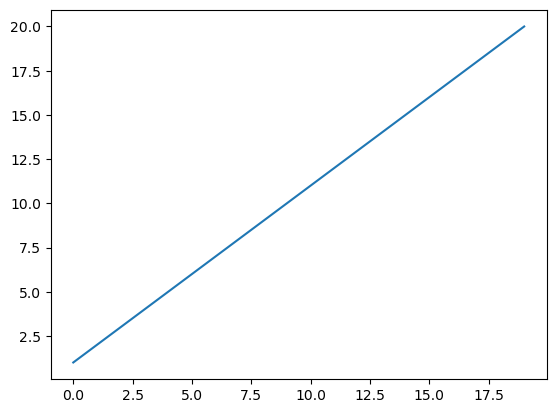

In [59]:
my_series.plot()

In [60]:
my_series.astype('str').plot()

TypeError: no numeric data to plot

<Axes: title={'center': 'test'}>

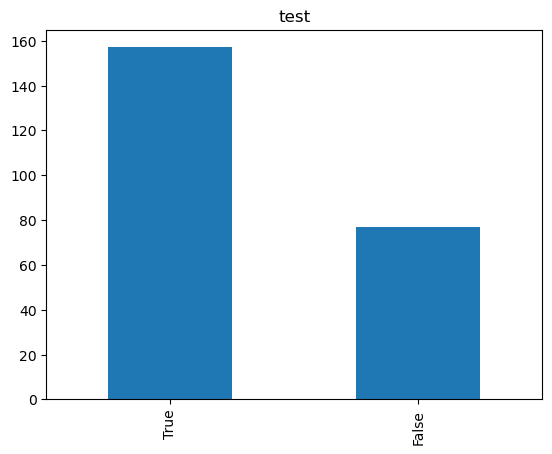

In [70]:
mpg_t.str.startswith('a').value_counts().plot.bar(title = 'test')

In [ ]:
p